Blocco iniziale da usare sempre

In [207]:
import pandas as pd
import fastf1 as ff1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import fastf1.plotting as f1plt
import fastf1.utils as f1u
from timple.timedelta import strftimedelta
from timple.timedelta import num2timedelta
from fastf1.core import Laps

Q = ff1.get_session(2024, 'Austin', 4)
Q.load(weather=True)

Q2023 = ff1.get_session(2023, 'Austin', 2)
Q2023.load(weather=True)

SQ = ff1.get_session(2024, 'Austin', 2)
SQ.load()

SQ2023 = ff1.get_session(2023, 'Austin', 3)
SQ2023.load()

SR = ff1.get_session(2024, 'Austin', 3)
SR.load()

SR2023 = ff1.get_session(2023, 'Austin', 4)
SR2023.load()

R = ff1.get_session(2024, 'Austin', 5)
R.load()

R2023 = ff1.get_session(2023, 'Austin', 5)
R2023.load()

drivers = ['NOR', 'VER', 'SAI', 'LEC', 'PIA', 'RUS', 'GAS', 'ALO', 'MAG', 'PER', 'TSU', 'HUL', 'OCO', 'STR', 'LAW', 'ALB', 'COL', 'BOT', 'HAM', 'ZHO']
drivers2023 = ['LEC', 'NOR', 'HAM', 'SAI', 'RUS', 'VER', 'GAS', 'OCO', 'PER', 'PIA', 'TSU', 'ZHO', 'BOT', 'MAG', 'RIC', 'HUL', 'ALO', 'ALB', 'STR', 'SAR']

core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '55', '16', '81', '63', '10', '14', '20', '11', '22', '27', '31', '18', '30', '23', '43', '77', '44', '24']
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.4]
req            I

Grafico velocità media raggiunta sul rettilineo per ogni team nel 2023 e nel 2024   (Grafico numero 10 della scaletta)

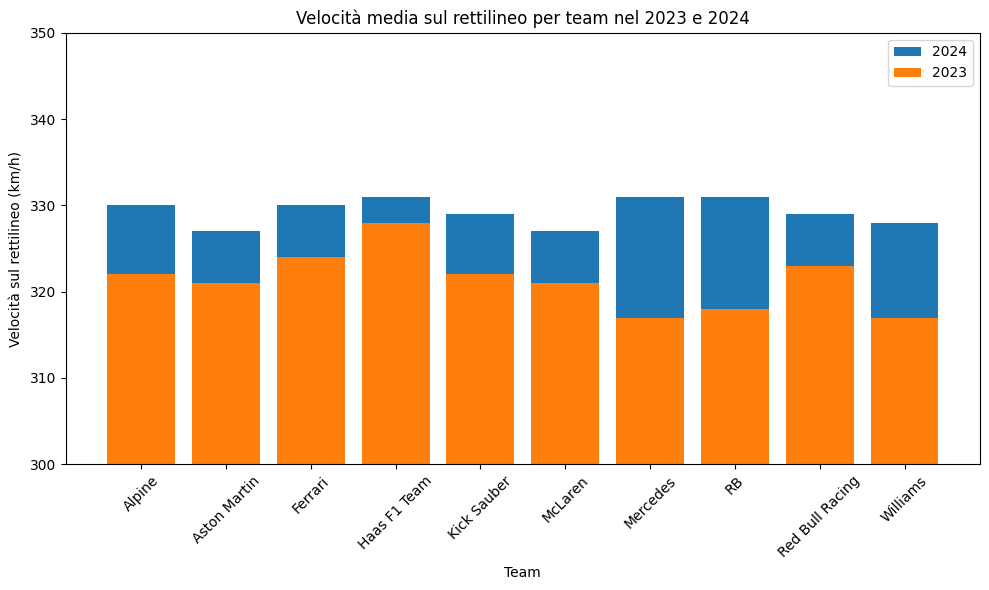

In [208]:
Q1, Q2, Q3 = Q.laps.split_qualifying_sessions()

velocita_media_sul_dritto_2024 = Q1.pick_quicklaps()[["Team", "SpeedST"]]
velocita_media_sul_dritto_2024 = pd.concat([velocita_media_sul_dritto_2024, Q2.pick_quicklaps()[["Team", "SpeedST"]]])
velocita_media_sul_dritto_2024 = pd.concat([velocita_media_sul_dritto_2024, Q3.pick_quicklaps().loc[:, ["Team", "SpeedST"]]])
velocita_media_sul_dritto_2024 = velocita_media_sul_dritto_2024.groupby('Team').mean().round(0)

Q1, Q2, Q3 = Q2023.laps.split_qualifying_sessions()
velocita_media_sul_dritto_2023 = Q1.pick_quicklaps()[["Team", "SpeedST"]]
velocita_media_sul_dritto_2023 = pd.concat([velocita_media_sul_dritto_2023, Q2.pick_quicklaps()[["Team", "SpeedST"]]])
velocita_media_sul_dritto_2023 = pd.concat([velocita_media_sul_dritto_2023, Q3.pick_quicklaps().loc[:, ["Team", "SpeedST"]]])
velocita_media_sul_dritto_2023 = velocita_media_sul_dritto_2023.groupby('Team').mean().round(0)
velocita_media_sul_dritto_2023 = velocita_media_sul_dritto_2023.rename(index={'Alfa Romeo': 'Kick Sauber', 'AlphaTauri': 'RB'})
velocita_media_sul_dritto_2023 = velocita_media_sul_dritto_2023.sort_index()

plt.figure(figsize=(10, 6))
plt.bar(velocita_media_sul_dritto_2024.index, velocita_media_sul_dritto_2024['SpeedST'], label='2024')
plt.bar(velocita_media_sul_dritto_2023.index, velocita_media_sul_dritto_2023['SpeedST'], label='2023')
plt.xlabel('Team')
plt.ylabel('Velocità sul rettilineo (km/h)')
plt.title('Velocità media sul rettilineo per team nel 2023 e 2024')
plt.legend()
plt.ylim(300, 350)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafico rappresentante il tempo migliore per ogni giro di gara che sia stato fatto con bandiera verde (tracciato libero senza problemi) nel 2023 e nel 2024 (opzioni del grafico 12 della scaletta)

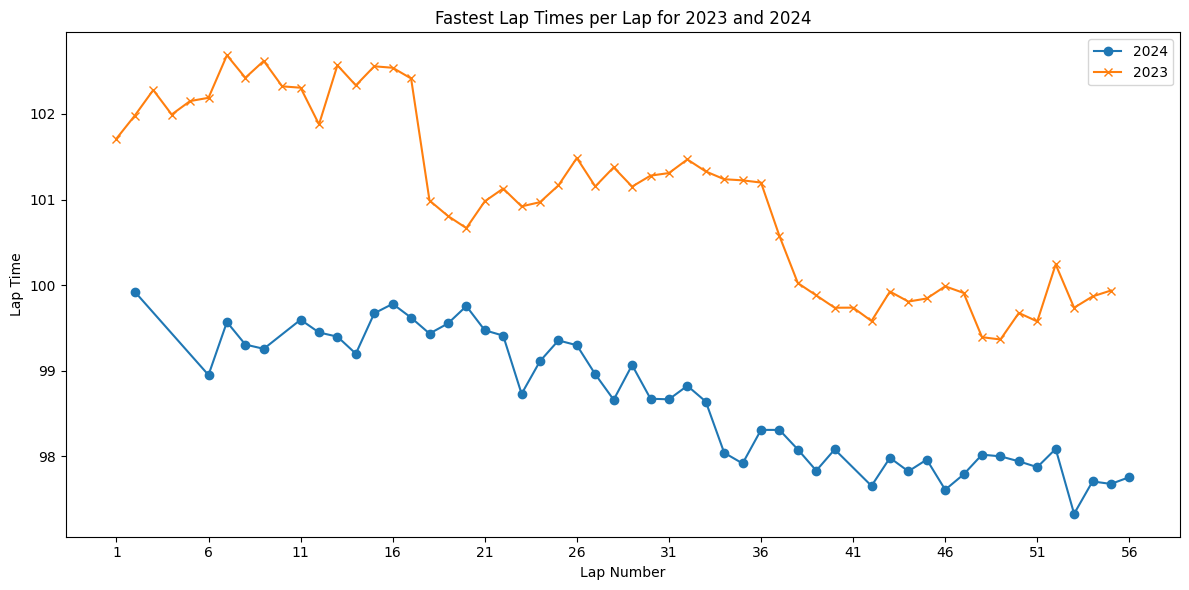

In [209]:
race_2024_fastest_laps = pd.DataFrame()
race_2023_fastest_laps = pd.DataFrame()

for i in range(1, 57):
    fastest_lap = R.laps.pick_laps(i).sort_values(by='LapTime')[['Driver', 'LapNumber', 'LapTime', 'TrackStatus']].head(1)
    fastest_lap['LapTime'] = fastest_lap['LapTime'].apply(lambda x: x.total_seconds())
    fastest_lap = fastest_lap[fastest_lap['TrackStatus'] == '1']
    race_2024_fastest_laps = pd.concat([race_2024_fastest_laps, fastest_lap])

for i in range(1, 57):
    fastest_lap = R2023.laps.pick_laps(i).sort_values(by='LapTime')[['Driver', 'LapNumber', 'LapTime', 'TrackStatus']].head(1)
    fastest_lap['LapTime'] = fastest_lap['LapTime'].apply(lambda x: x.total_seconds())
    fastest_lap = fastest_lap[fastest_lap['TrackStatus'] == '1']
    race_2023_fastest_laps = pd.concat([race_2023_fastest_laps, fastest_lap])
    
plt.figure(figsize=(12, 6))

plt.plot(race_2024_fastest_laps['LapNumber'], race_2024_fastest_laps['LapTime'], marker='o', label='2024')
plt.plot(race_2023_fastest_laps['LapNumber'], race_2023_fastest_laps['LapTime'], marker='x', label='2023')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Fastest Lap Times per Lap for 2023 and 2024')
plt.legend()
plt.xticks(np.arange(1, 57, 5))
plt.tight_layout()
plt.show()


Tempo sul giro di ogni giro di gara del vincitore del 2023 e del vincitore del 2024, evidenziati per ogni stint effettuato (opzione del grafico 12)

c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


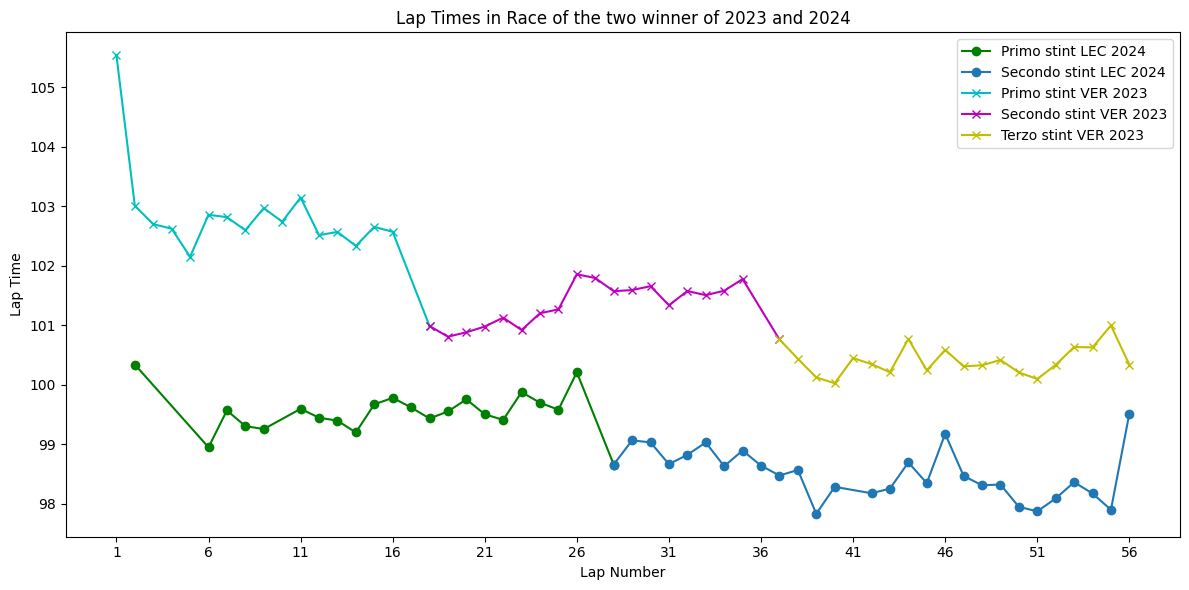

In [210]:
laps_vincitore_2024 = R.laps.pick_driver('LEC').pick_quicklaps()[['Driver', 'LapNumber', 'LapTime', 'TrackStatus', 'Compound', 'TyreLife']]
laps_vincitore_2024['LapTime'] = laps_vincitore_2024['LapTime'].apply(lambda x: x.total_seconds())
laps_vincitore_2024 = laps_vincitore_2024[laps_vincitore_2024['TrackStatus'] == '1']

laps_vincitore_2023 = R2023.laps.pick_driver('VER').pick_quicklaps()[['Driver', 'LapNumber', 'LapTime', 'TrackStatus', 'Compound', 'TyreLife']]
laps_vincitore_2023['LapTime'] = laps_vincitore_2023['LapTime'].apply(lambda x: x.total_seconds())
laps_vincitore_2023 = laps_vincitore_2023[laps_vincitore_2023['TrackStatus'] == '1']

laps_primoStint_2024 = laps_vincitore_2024[laps_vincitore_2024['LapNumber'] <= 28.0]
laps_secondoStint_2024 = laps_vincitore_2024[laps_vincitore_2024['LapNumber'] >= 28.0]

laps_primoStint_2023 = laps_vincitore_2023[laps_vincitore_2023['LapNumber'] <= 18.0]
laps_secondoStint_2023 = laps_vincitore_2023[(laps_vincitore_2023['LapNumber'] >= 18.0) & (laps_vincitore_2023['LapNumber'] <= 37.0)]
laps_terzoStint_2023 = laps_vincitore_2023[laps_vincitore_2023['LapNumber'] >= 37.0]


plt.figure(figsize=(12, 6))

plt.plot(laps_primoStint_2024['LapNumber'], laps_primoStint_2024['LapTime'], marker='o', c='g', label='Primo stint LEC 2024')
plt.plot(laps_secondoStint_2024['LapNumber'], laps_secondoStint_2024['LapTime'], marker='o', label='Secondo stint LEC 2024')
plt.plot(laps_primoStint_2023['LapNumber'], laps_primoStint_2023['LapTime'], marker='x', c='c', label='Primo stint VER 2023')
plt.plot(laps_secondoStint_2023['LapNumber'], laps_secondoStint_2023['LapTime'], marker='x', c='m', label='Secondo stint VER 2023')
plt.plot(laps_terzoStint_2023['LapNumber'], laps_terzoStint_2023['LapTime'], marker='x', c='y', label='Terzo stint VER 2023')

plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Lap Times in Race of the two winner of 2023 and 2024')
plt.legend()
plt.xticks(np.arange(1, 57, 5))
plt.tight_layout()
plt.show()

Due opzioni di un grafico sulla velocità media mantenuta nel q2 e nel q3 delle qualifiche del 2023 e del 2024, considerando tutti i giri validi con un tempo inferiore al 107% dal giro della pole (grafico 3 della qualifica)

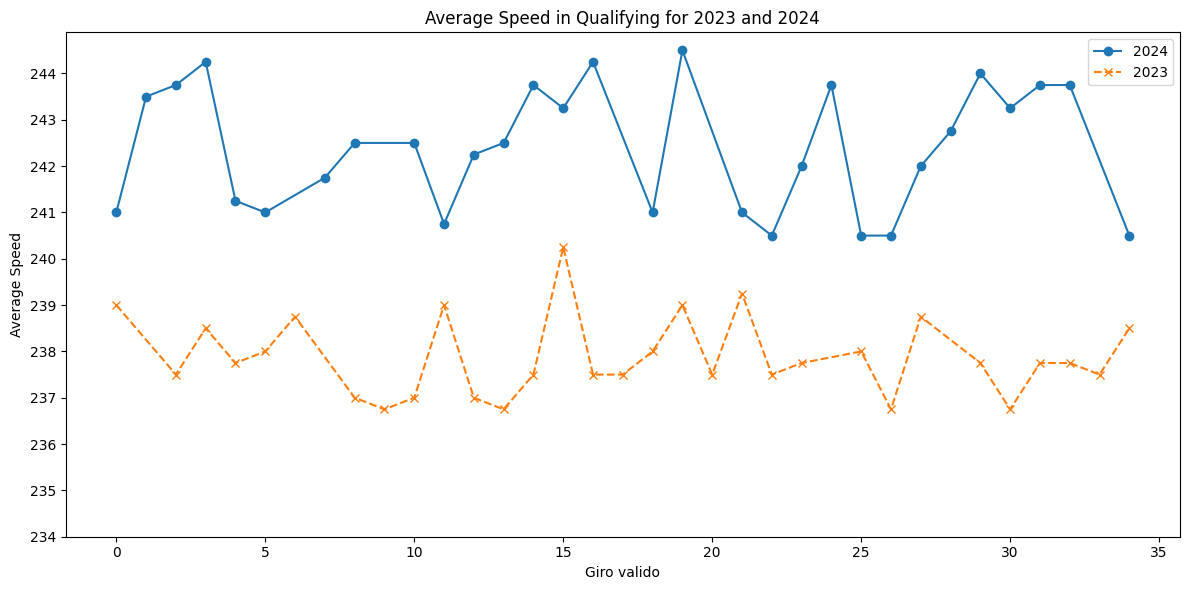

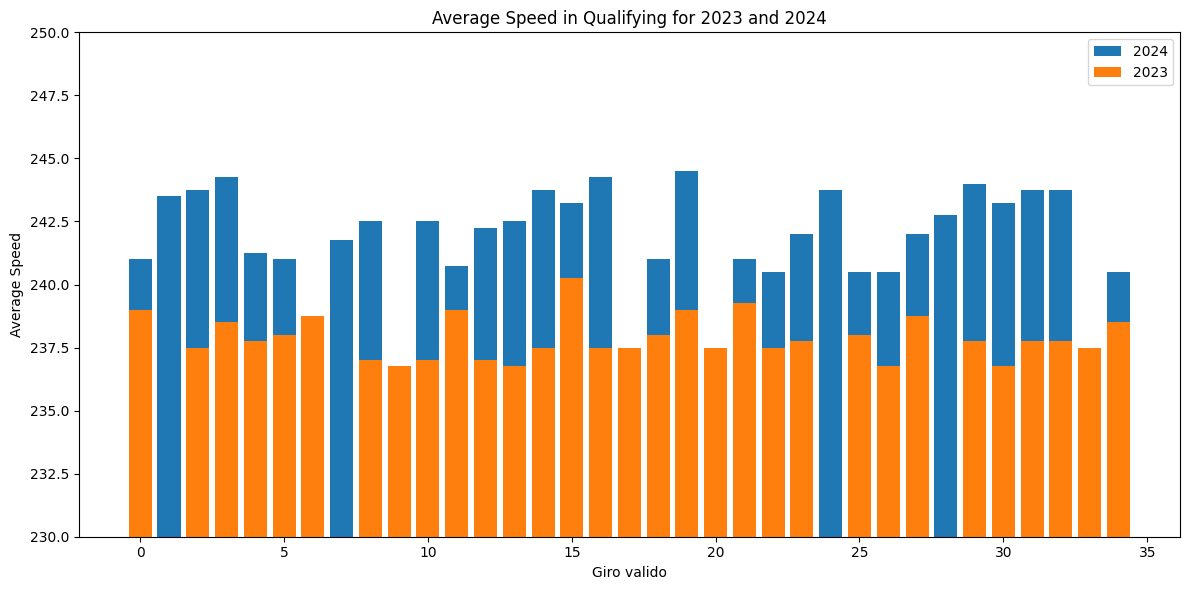

In [211]:
Q1, Q2, Q3 = Q.laps.split_qualifying_sessions()

avg_speed_2024 = Q3.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]
avg_speed_2024 = pd.concat([avg_speed_2024, Q2.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]])
speedAvg2024 = avg_speed_2024.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
avg_speed_2024 = avg_speed_2024.assign(SpeedAvg=speedAvg2024)
avg_speed_2024 = avg_speed_2024.reset_index(drop=True)#.reset_index().rename(columns={'index': 'Tentativo'})

Q1_2023, Q2_2023, Q3_2023 = Q2023.laps.split_qualifying_sessions()

avg_speed_2023 = Q3_2023.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]
avg_speed_2023 = pd.concat([avg_speed_2023, Q2_2023.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]])
speedAvg2023 = avg_speed_2023.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
avg_speed_2023 = avg_speed_2023.assign(SpeedAvg=speedAvg2023)
avg_speed_2023 = avg_speed_2023.reset_index(drop=True).head(35)

avg_speed_2024 = avg_speed_2024[(avg_speed_2024['SpeedAvg'] > avg_speed_2024['SpeedAvg'].quantile(0.05)) & (avg_speed_2024['SpeedAvg'] < avg_speed_2024['SpeedAvg'].quantile(0.95))]
avg_speed_2023 = avg_speed_2023[(avg_speed_2023['SpeedAvg'] > avg_speed_2023['SpeedAvg'].quantile(0.05)) & (avg_speed_2023['SpeedAvg'] < avg_speed_2023['SpeedAvg'].quantile(0.95))]



plt.figure(figsize=(12, 6))

plt.plot(avg_speed_2024.index, avg_speed_2024['SpeedAvg'], marker='o', linestyle='-', label='2024')
plt.plot(avg_speed_2023.index, avg_speed_2023['SpeedAvg'], marker='x', linestyle='--', label='2023')
plt.xlabel('Giro valido')
plt.ylabel('Average Speed')
plt.title('Average Speed in Qualifying for 2023 and 2024')
plt.legend()
plt.yticks(np.arange(234, 245, 1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.bar(avg_speed_2024.index, avg_speed_2024['SpeedAvg'], label='2024')
plt.bar(avg_speed_2023.index, avg_speed_2023['SpeedAvg'],  label='2023')

plt.xlabel('Giro valido')
plt.ylabel('Average Speed')
plt.title('Average Speed in Qualifying for 2023 and 2024')
plt.legend()
plt.ylim(230, 250)
plt.tight_layout()
plt.show()

Confronto top 10 della qualifica sprint (venerdì) e della qualifica normale (sabato) del 2024 per vedere la gommatura (grafico 14 della scaletta)

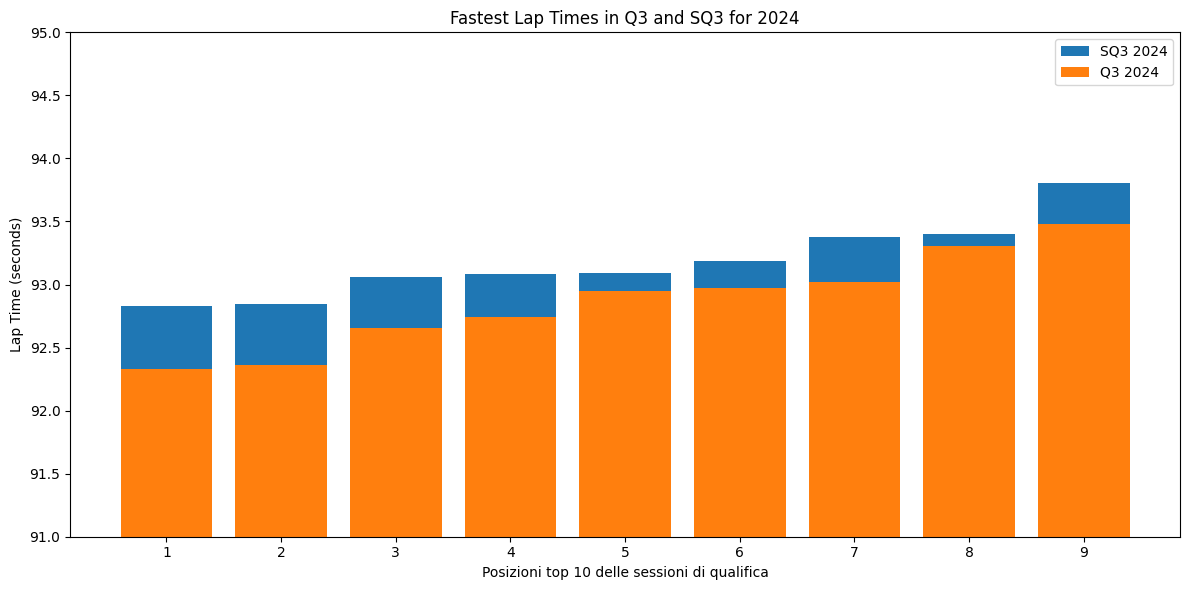

In [212]:
_, _, SQ3 = SQ.laps.split_qualifying_sessions()
_, _, Q3= Q.laps.split_qualifying_sessions()

driversQ3 = pd.unique(Q.laps['Driver'])[:9]
driversSQ3 = ['VER', 'RUS', 'LEC', 'NOR', 'SAI','HUL', 'HAM', 'MAG', 'TSU']

fastest_laps_Q3 = pd.DataFrame()
fastest_laps_SQ3 = pd.DataFrame()

i = 1
for driver in driversQ3:
    fastest_lap = Q3.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_Q3 = pd.concat([fastest_laps_Q3, fastest_lap])

i = 1
for driver in driversSQ3:
    fastest_lap = SQ3.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_SQ3 = pd.concat([fastest_laps_SQ3, fastest_lap])

#fastest_laps_SQ3 = fastest_laps_SQ3.sort_index()
fastest_laps_SQ3.set_index("DriverPosition", inplace=True)
fastest_laps_Q3.set_index("DriverPosition", inplace=True)

# Plot the fastest lap times for Q3 and SQ3
plt.figure(figsize=(12, 6))

plt.bar(fastest_laps_SQ3.index, fastest_laps_SQ3['LapTime'].apply(lambda x: x.total_seconds()),  label='SQ3 2024')
plt.bar(fastest_laps_Q3.index, fastest_laps_Q3['LapTime'].apply(lambda x: x.total_seconds()),  label='Q3 2024')

plt.xlabel('Posizioni top 10 delle sessioni di qualifica')
plt.ylabel('Lap Time (seconds)')
plt.title('Fastest Lap Times in Q3 and SQ3 for 2024')
plt.legend()
plt.ylim(91, 95)
plt.xticks(np.arange(1, 10, 1))
plt.tight_layout()
plt.show()

Confronto top 10 della qualifica sprint del 2023 (sabato) e della qualifica normale del 2024 (sabato) per vedere la differenza fra due qualifiche fatte nella stessa giornata (grafico 14 della scaletta)

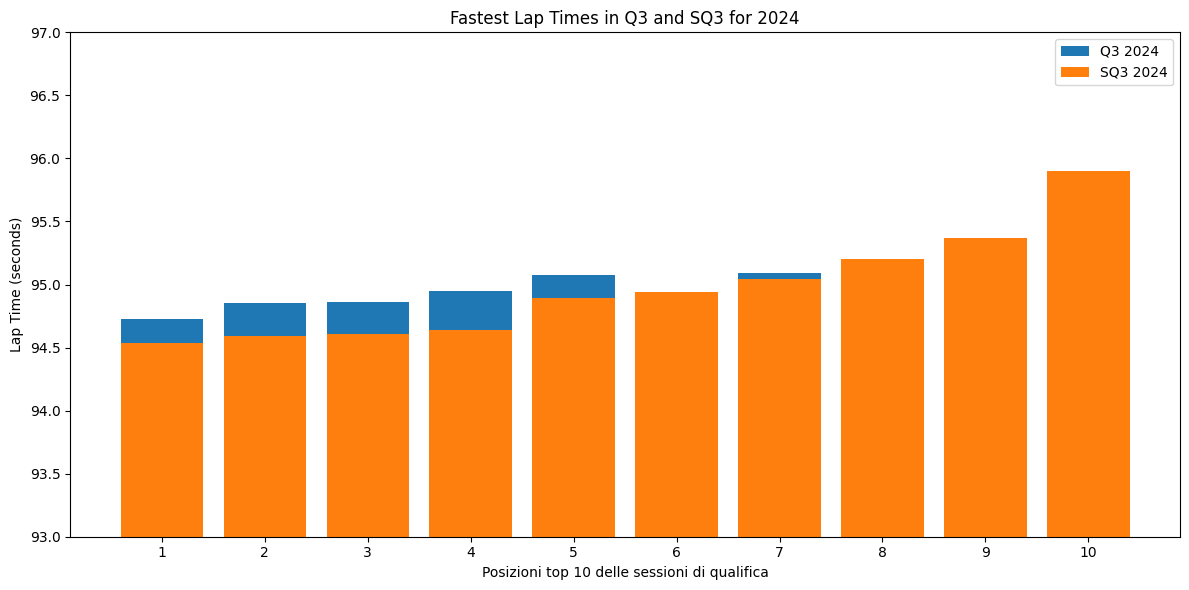

In [213]:
_, _, SQ3 = SQ2023.laps.split_qualifying_sessions()
_, _, Q3= Q2023.laps.split_qualifying_sessions()

driversQ3 = ['LEC', 'NOR', 'HAM', 'SAI', 'RUS', 'VER', 'GAS', 'OCO', 'PER', 'PIA']
driversSQ3 = ['VER', 'LEC', 'HAM', 'NOR', 'PIA','SAI', 'PER', 'RUS', 'ALB', 'GAS']

fastest_laps_Q3 = pd.DataFrame()
fastest_laps_SQ3 = pd.DataFrame()

i = 1
for driver in driversQ3:
    fastest_lap = Q3.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_Q3 = pd.concat([fastest_laps_Q3, fastest_lap])

i = 1
for driver in driversSQ3:
    fastest_lap = SQ3.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_SQ3 = pd.concat([fastest_laps_SQ3, fastest_lap])

#fastest_laps_SQ3 = fastest_laps_SQ3.sort_index()
fastest_laps_SQ3.set_index("DriverPosition", inplace=True)
fastest_laps_Q3.set_index("DriverPosition", inplace=True)

# Plot the fastest lap times for Q3 and SQ3
plt.figure(figsize=(12, 6))

plt.bar(fastest_laps_Q3.index, fastest_laps_Q3['LapTime'].apply(lambda x: x.total_seconds()),  label='Q3 2024')
plt.bar(fastest_laps_SQ3.index, fastest_laps_SQ3['LapTime'].apply(lambda x: x.total_seconds()),  label='SQ3 2024')

plt.xlabel('Posizioni top 10 delle sessioni di qualifica')
plt.ylabel('Lap Time (seconds)')
plt.title('Fastest Lap Times in Q3 and SQ3 for 2024')
plt.legend()
plt.xticks(np.arange(1, 11, 1))
plt.ylim(93, 97)
plt.tight_layout()
plt.show()

Grafico del coefficiente di carico aereodinamico (velocità media / velocità max) delle varie scuderie per far veder quanto sono rallentate le auto (da finire di sistemare) (grafico 13 della scaletta)

C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_3320\3527328379.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  max_speed_team_2024 = pd.concat([max_speed_team_2024, row])
C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_3320\3527328379.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  max_speed_team_2023 = pd.concat([max_speed_team_2023, row])


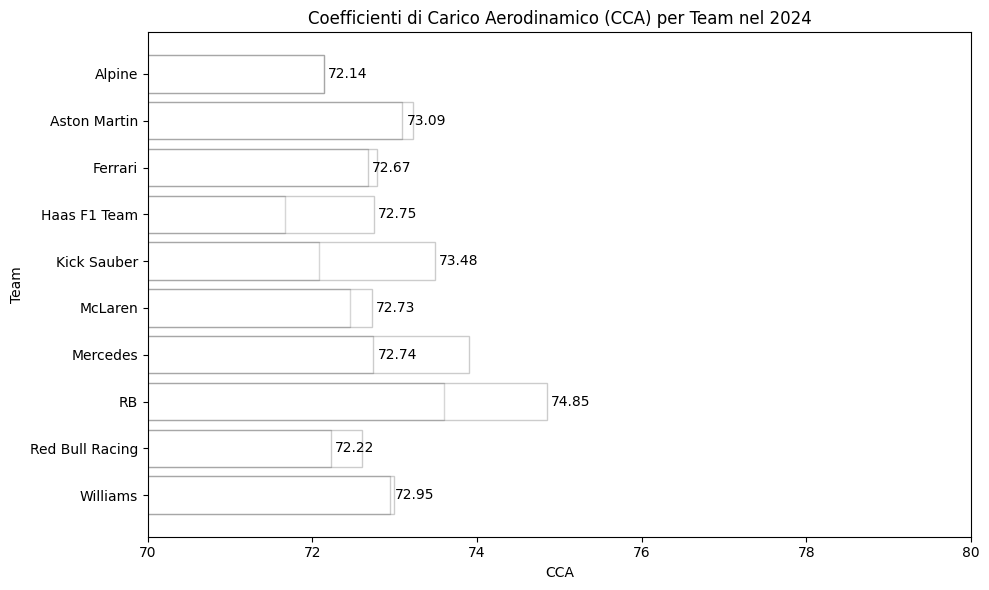

In [214]:
#velocità media qualifiche 2024
avg_speed_2024 = Q.laps.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]
speedAvg2024 = avg_speed_2024.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
avg_speed_2024 = avg_speed_2024.assign(SpeedAvg=speedAvg2024)
avg_speed_2024 = avg_speed_2024.reset_index(drop=True)

#velocità media qualifiche 2023
avg_speed_2023 = Q2023.laps.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]
speedAvg2023 = avg_speed_2023.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
avg_speed_2023 = avg_speed_2023.assign(SpeedAvg=speedAvg2023)
avg_speed_2023 = avg_speed_2023.reset_index(drop=True)

# ottengo la velocità media per scuderia
avg_media_per_scuderia_2023 = avg_speed_2023[['SpeedAvg', 'Team']].groupby('Team').mean().round(0)
avg_media_per_scuderia_2024 = avg_speed_2024[['SpeedAvg', 'Team']].groupby('Team').mean().round(0)

#ottengo i singoli team
team = pd.unique(Q.laps['Team'])

# creo un dataframe per i team con la velocità media e la velocità massima
max_speed_team_2024 = pd.DataFrame(columns=['Team', 'SpeedST' ,'SpeedAvg'])
max_speed_team_2023 = pd.DataFrame(columns=['Team', 'SpeedST' ,'SpeedAvg'])
for i in team:
    max_speed = Q.laps[Q.laps['Team'] == i]
    max_speed = max_speed[['SpeedST']].max(axis=0)
    spg = avg_speed_2024[avg_speed_2024['Team'] == i]
    spg = spg[['SpeedAvg']]
    row = pd.DataFrame({'Team': i, 'SpeedST': max_speed['SpeedST'], 'SpeedAvg': spg['SpeedAvg'].values[0]}, index=[0])
    max_speed_team_2024 = pd.concat([max_speed_team_2024, row])

    if i == 'Kick Sauber':
        i = 'Alfa Romeo'

    if i == 'RB':
        i = 'AlphaTauri'

    max_speed = Q2023.laps[Q2023.laps['Team'] == i]
    max_speed = max_speed[['SpeedST']].max(axis=0)
    spg = avg_speed_2023[avg_speed_2023['Team'] == i]
    spg = spg[['SpeedAvg']]
    row = pd.DataFrame({'Team': i, 'SpeedST': max_speed['SpeedST'], 'SpeedAvg': spg['SpeedAvg'].values[0]}, index=[0])
    max_speed_team_2023 = pd.concat([max_speed_team_2023, row])

# calcolo cca del 2024
max_speed_team_2024 = max_speed_team_2024.sort_values(by='Team', ascending=False)
CCA_scuderie_2024 = max_speed_team_2024['SpeedAvg'] / max_speed_team_2024['SpeedST']
CCA_scuderie_2024 = CCA_scuderie_2024 * 100

# calcolo cca del 2023
max_speed_team_2023['Team'] = max_speed_team_2023['Team'].replace({'AlphaTauri': 'RB', 'Alfa Romeo': 'Kick Sauber'})
max_speed_team_2023 = max_speed_team_2023.sort_values(by='Team', ascending=False)

CCA_scuderie_2023 = max_speed_team_2023['SpeedAvg'] / max_speed_team_2023['SpeedST']
CCA_scuderie_2023 = CCA_scuderie_2023 * 100

plt.figure(figsize=(10, 6))
plt.barh(max_speed_team_2023['Team'], CCA_scuderie_2023, color='white', edgecolor='black', alpha=0.2)

plt.barh(max_speed_team_2024['Team'], CCA_scuderie_2024, color='white', edgecolor='black', alpha=0.2)
plt.xlabel('CCA')
plt.ylabel('Team')
plt.title('Coefficienti di Carico Aerodinamico (CCA) per Team nel 2024')
plt.xlim(70,80)
plt.tight_layout()
for index, value in enumerate(CCA_scuderie_2024):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center')
plt.show()

Grafico differenza tempo della pole 2023 2024 (grafico 1 della scaletta)

C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_3320\1113424855.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


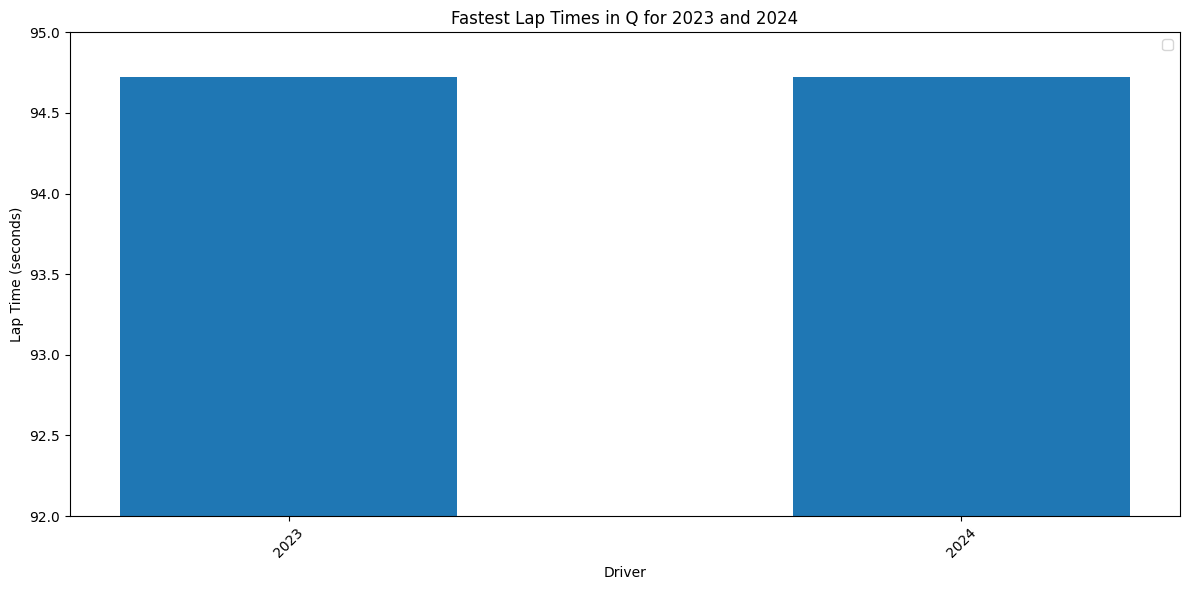

In [215]:
pole_2023 = Q3_2023.pick_fastest()[['Driver', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']]
pole_2024 = Q3.pick_fastest()[['Driver', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']]
pole_2023['Year'] = '2023'
pole_2024['Year'] = '2024'
c = pd.concat([pole_2023, pole_2024])
plt.figure(figsize=(12, 6))
plt.bar(c["Year"], c['LapTime'].apply(lambda x: x.total_seconds()), width=0.5)

plt.xlabel('Driver')
plt.ylabel('Lap Time (seconds)')
plt.title('Fastest Lap Times in Q for 2023 and 2024')
plt.legend()
plt.ylim(92, 95)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafico differenze nei tempi delle pole 2023 2024 e degli ultimi classificati (opzione del grafico 2 della scaletta)

C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_3320\736909227.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


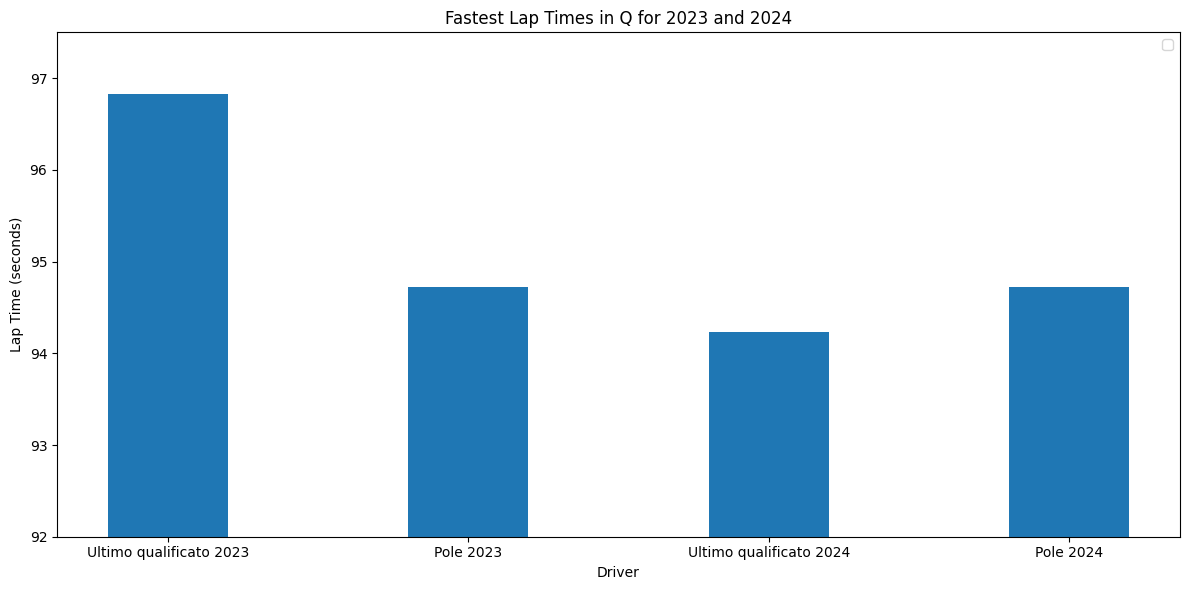

In [216]:
last_qualified_2023 = Q1_2023.pick_drivers('SAR').pick_fastest()[['Driver', 'LapTime']]
last_qualified_2024 = Q1.pick_drivers('ZHO').pick_fastest()[['Driver', 'LapTime']]
pole_2024['Label'] = 'Pole 2024'
pole_2023['Label'] = 'Pole 2023'
last_qualified_2024['Label'] = 'Ultimo qualificato 2024'
last_qualified_2023['Label'] = 'Ultimo qualificato 2023'
c = pd.concat([last_qualified_2023, pole_2023, last_qualified_2024, pole_2024])
plt.figure(figsize=(12, 6))
plt.bar(c["Label"], c['LapTime'].apply(lambda x: x.total_seconds()), width=0.4)

plt.xlabel('Driver')
plt.ylabel('Lap Time (seconds)')
plt.title('Fastest Lap Times in Q for 2023 and 2024')
plt.legend()
plt.ylim(92, 97.5)
plt.tight_layout()
plt.show()

Grafico intertempi qualifiche delle pole tra 2023 e 2024 (opzione grafico 2 della scaletta)

C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_3320\4263997103.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sec1 = pd.concat([sec1, pd.DataFrame({'Label': ['Intertempo 1 Pole 2023'], 'Driver': [pole_2023['Driver']], 'SectorTime': [pole_2023['Sector1Time']], 'Year': [pole_2023['Year']]})])
C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_3320\4263997103.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sec2 = pd.concat([sec2, pd.DataFrame({'Label': ['Intertempo 2 Pole 2023'], 'Driv

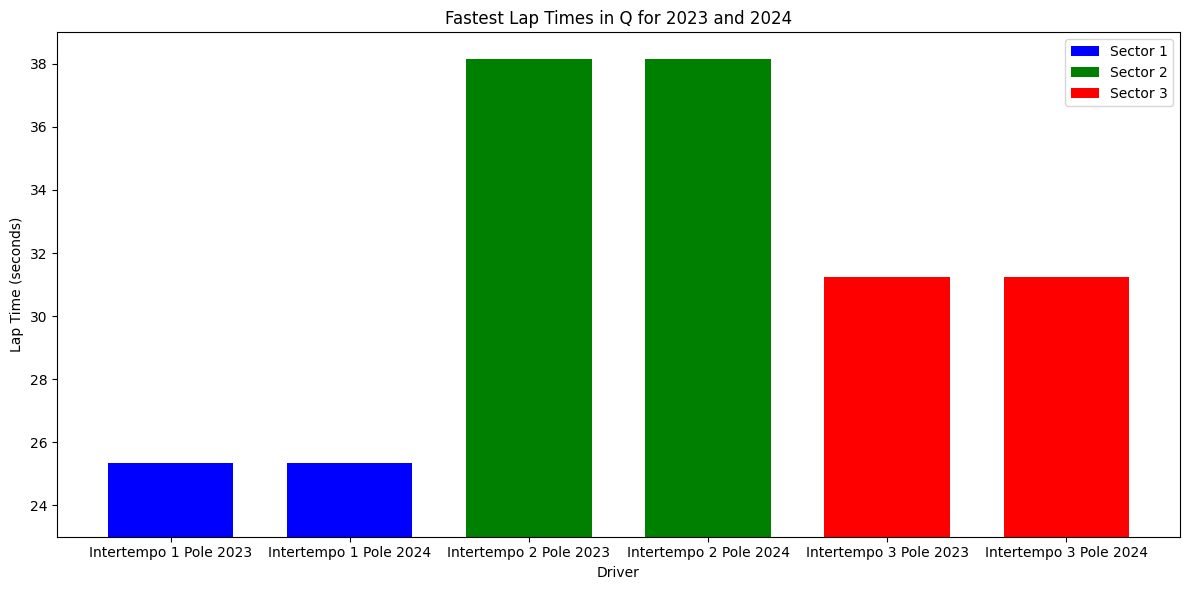

In [217]:
sec1 = sec2 = sec3 = pd.DataFrame(columns=['Label', 'Driver', 'SectorTime', 'Year'])
sec1 = pd.concat([sec1, pd.DataFrame({'Label': ['Intertempo 1 Pole 2023'], 'Driver': [pole_2023['Driver']], 'SectorTime': [pole_2023['Sector1Time']], 'Year': [pole_2023['Year']]})])
sec1 = pd.concat([sec1, pd.DataFrame({'Label': ['Intertempo 1 Pole 2024'], 'Driver': [pole_2024['Driver']], 'SectorTime': [pole_2024['Sector1Time']], 'Year': [pole_2024['Year']]})])
sec2 = pd.concat([sec2, pd.DataFrame({'Label': ['Intertempo 2 Pole 2023'], 'Driver': [pole_2023['Driver']], 'SectorTime': [pole_2023['Sector2Time']], 'Year': [pole_2023['Year']]})])
sec2 = pd.concat([sec2, pd.DataFrame({'Label': ['Intertempo 2 Pole 2024'], 'Driver': [pole_2024['Driver']], 'SectorTime': [pole_2024['Sector2Time']], 'Year': [pole_2024['Year']]})])
sec3 = pd.concat([sec3, pd.DataFrame({'Label': ['Intertempo 3 Pole 2023'], 'Driver': [pole_2023['Driver']], 'SectorTime': [pole_2023['Sector3Time']], 'Year': [pole_2023['Year']]})])
sec3 = pd.concat([sec3, pd.DataFrame({'Label': ['Intertempo 3 Pole 2024'], 'Driver': [pole_2024['Driver']], 'SectorTime': [pole_2024['Sector3Time']], 'Year': [pole_2024['Year']]})])

plt.figure(figsize=(12, 6))
plt.bar(sec1["Label"], sec1['SectorTime'].apply(lambda x: x.total_seconds()), width=0.7, color='blue', label='Sector 1')
plt.bar(sec2["Label"], sec2['SectorTime'].apply(lambda x: x.total_seconds()), width=0.7, color='green', label='Sector 2')
plt.bar(sec3["Label"], sec3['SectorTime'].apply(lambda x: x.total_seconds()), width=0.7, color='red', label='Sector 3')

plt.xlabel('Driver')
plt.ylabel('Lap Time (seconds)')
plt.title('Fastest Lap Times in Q for 2023 and 2024')
plt.legend()
plt.ylim(23, 39)
plt.tight_layout()
plt.show()

Grafico temperatura dell'aria nelle sessioni di qualifica (opzione 5 della scaletta)


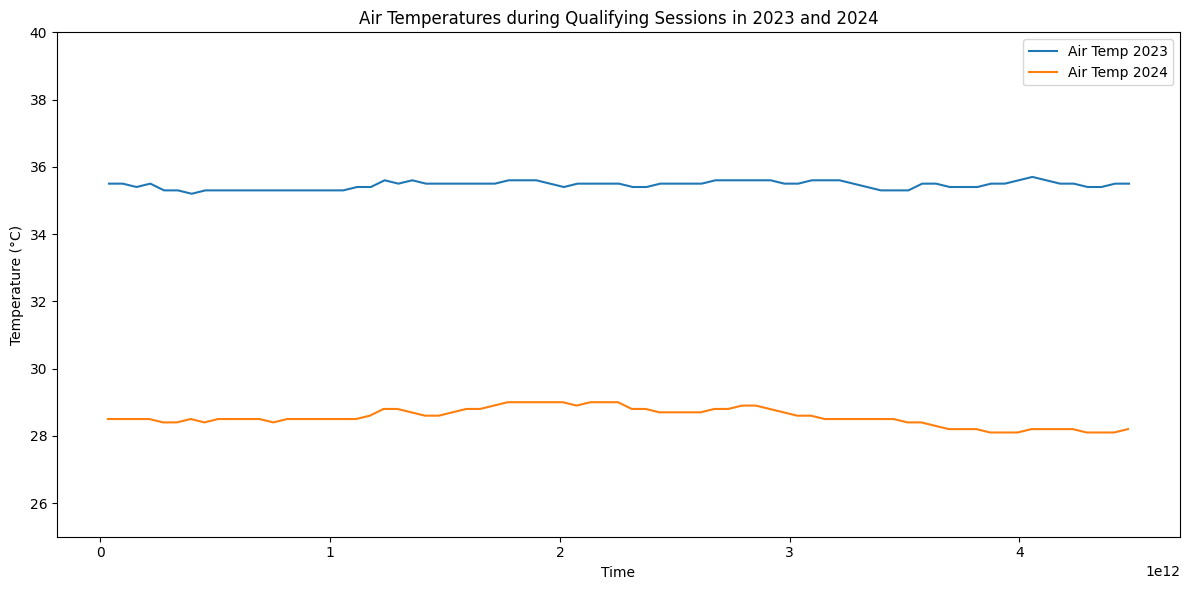

In [218]:
temperaure2024 = Q.weather_data[['Time', 'AirTemp', 'Humidity', 'TrackTemp']]
temperaure2023 = Q2023.weather_data[['Time', 'AirTemp', 'Humidity', 'TrackTemp']].head(75)
plt.figure(figsize=(12, 6))

plt.plot(temperaure2023['Time'], temperaure2023['AirTemp'], label='Air Temp 2023')
plt.plot(temperaure2024['Time'], temperaure2024['AirTemp'], label='Air Temp 2024')

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Air Temperatures during Qualifying Sessions in 2023 and 2024')
plt.legend()
plt.ylim(25,40)
plt.tight_layout()
plt.show()

Grafico temperatura del tracciato nelle sessioni di qualifica (opzione 5 della scaletta)

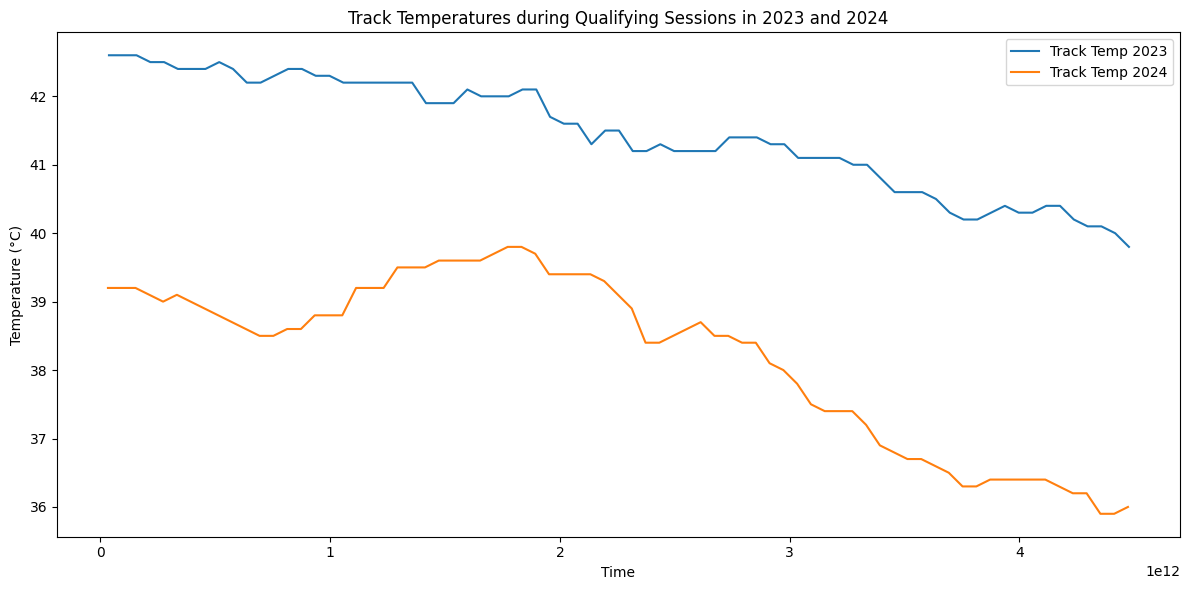

In [219]:
plt.figure(figsize=(12, 6))
plt.plot(temperaure2023['Time'], temperaure2023['TrackTemp'], label='Track Temp 2023')
plt.plot(temperaure2024['Time'], temperaure2024['TrackTemp'], label='Track Temp 2024')

plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Track Temperatures during Qualifying Sessions in 2023 and 2024')
plt.legend()
plt.tight_layout()
plt.show()

Grafico temperatura massima, media e minima dell'aria e del tracciato nella sessione di qualifica (opzione 5 della scaletta)


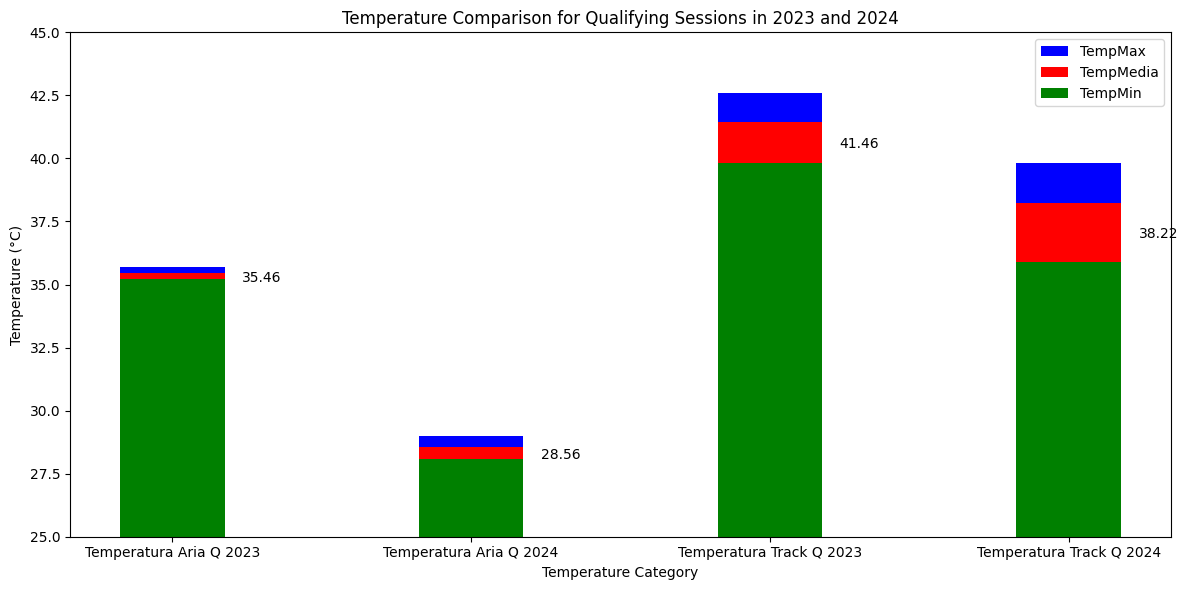

In [220]:
air_temp_2024 = pd.DataFrame({'Label': ['Temperatura Aria Q 2024'], 'TempMedia': [temperaure2024['AirTemp'].mean()], 'TempMax': [temperaure2024['AirTemp'].max()], 'TempMin': [temperaure2024['AirTemp'].min()]})
air_temp_2023 = pd.DataFrame({'Label': ['Temperatura Aria Q 2023'], 'TempMedia': [temperaure2023['AirTemp'].mean()], 'TempMax': [temperaure2023['AirTemp'].max()], 'TempMin': [temperaure2023['AirTemp'].min()]})
track_temp_2024 = pd.DataFrame({'Label': ['Temperatura Track Q 2024'], 'TempMedia': [temperaure2024['TrackTemp'].mean()], 'TempMax': [temperaure2024['TrackTemp'].max()], 'TempMin': [temperaure2024['TrackTemp'].min()]})
track_temp_2023 = pd.DataFrame({'Label': ['Temperatura Track Q 2023'], 'TempMedia': [temperaure2023['TrackTemp'].mean()], 'TempMax': [temperaure2023['TrackTemp'].max()], 'TempMin': [temperaure2023['TrackTemp'].min()]})

# Combine all temperature data into a single DataFrame
temperature_data = pd.concat([air_temp_2023, air_temp_2024, track_temp_2023, track_temp_2024]).reset_index(drop=True)
# Plot the temperature data
plt.figure(figsize=(12, 6))
bar_width = 0.35

# Plotting the average temperatures
plt.bar(temperature_data['Label'], temperature_data['TempMax'], bar_width, label='TempMax', color='b')

# Plotting the maximum temperatures
plt.bar(temperature_data['Label'], temperature_data['TempMedia'], bar_width,  label='TempMedia', color='r')

# Plotting the minimum temperatures
plt.bar(temperature_data['Label'], temperature_data['TempMin'], bar_width, label='TempMin', color='g')
# Annotate the bars with the average temperature
for index, row in temperature_data.iterrows():
    plt.text(index+0.3, (row['TempMedia']-row['TempMin'])/2+row['TempMin']-0.35, f'{row["TempMedia"]:.2f}', ha='center', va='bottom', color='black')
plt.xlabel('Temperature Category')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Comparison for Qualifying Sessions in 2023 and 2024')
plt.legend()
plt.ylim(25, 45)
plt.tight_layout()
plt.show()


Grafico distacco tra la pole del 2024 (tenuta fissa) e la pole del 2023, con indicazioni delle curve ()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\fastf1\utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\fastf1\utils.py:89: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


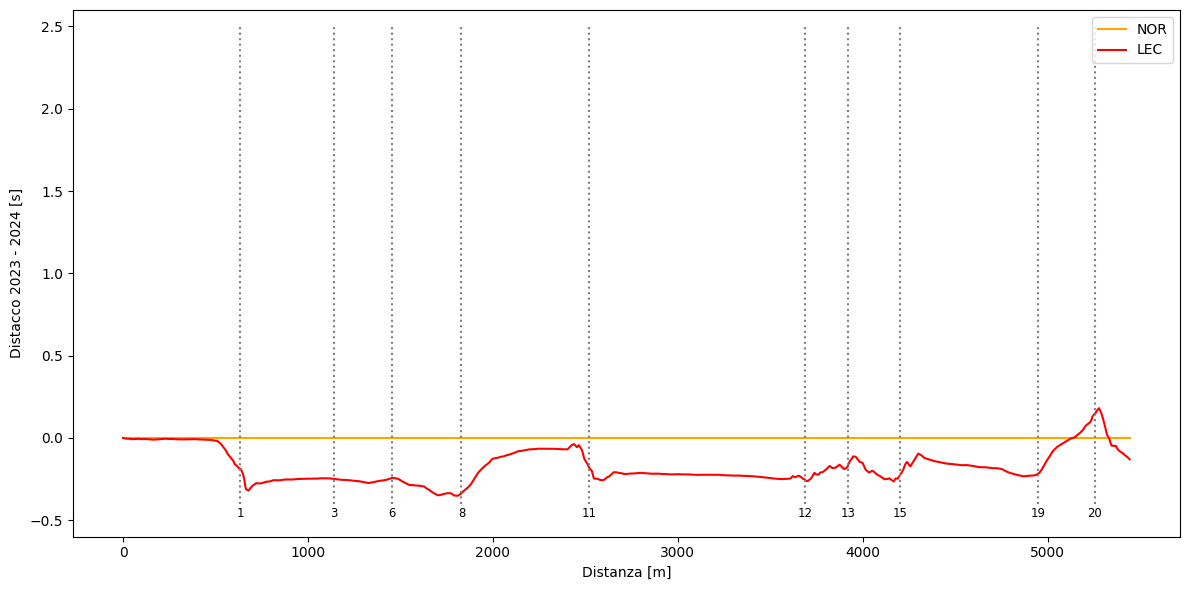

In [225]:
import fastf1.utils as f1u
from timple.timedelta import strftimedelta
from timple.timedelta import num2timedelta

circuit_info = Q.get_circuit_info()
selected_corners = [i-1 for i in (1,3,6,8,11,12,13,15,19,20)]

lec_pole_2023 = Q3_2023.pick_drivers('LEC').pick_fastest()
nor_pole_2024 = Q3.pick_drivers('NOR').pick_fastest()

delta_time_lec, ref_tel_lec, compare_tel_lec = f1u.delta_time(nor_pole_2024, lec_pole_2023)
delta_time_nor, ref_tel_nor, compare_tel_nor = f1u.delta_time(nor_pole_2024, nor_pole_2024)

plt.figure(figsize=(12, 6))
plt.plot(ref_tel_nor['Distance'], delta_time_nor, color='orange', label='NOR')
plt.plot(ref_tel_nor['Distance'], delta_time_lec, color='red', label='LEC')

for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        plt.text(corner['Distance'], -.45, txt,
                va='center_baseline', ha='center', size='small')
        
plt.ylabel(f"Distacco 2023 - 2024 [s]")
plt.xlabel('Distanza [m]')
#ax[1].legend()
plt.ylim([-0.6,2.6])
plt.vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=-.4, ymax=2.5,
          linestyles='dotted', colors='grey')

plt.tight_layout()
plt.legend()
plt.show()


Adesso ottengo la mappa del circuito

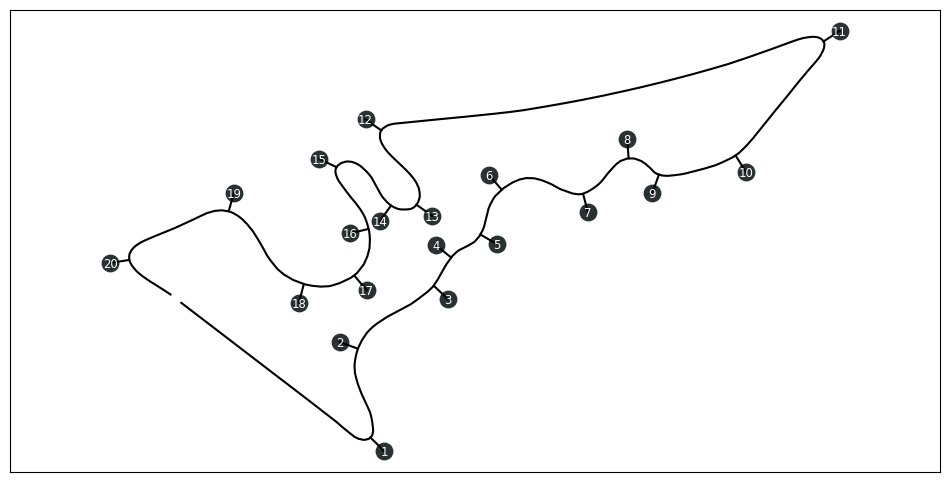

In [222]:
lap = Q.laps.pick_fastest()
pos = lap.get_pos_data()

def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

plt.figure(figsize=(12, 6))
# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1], color = 'black')

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Highlight the section between corner 9 and corner 12
highlight_start = circuit_info.corners.loc[circuit_info.corners['Number'] == 9, ['X', 'Y']].values[0]
highlight_end = circuit_info.corners.loc[circuit_info.corners['Number'] == 12, ['X', 'Y']].values[0]

highlight_start = rotate(highlight_start, angle=track_angle)
highlight_end = rotate(highlight_end, angle=track_angle)

highlight_section = track[(track[:, 0] >= highlight_start[0]) & (track[:, 0] <= highlight_end[0])]

plt.plot(highlight_section[:, 0], highlight_section[:, 1], color='yellow', linewidth=10)

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='#293133', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='black')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')


plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()


Grafico uso dell'acceleratore tra le due pole

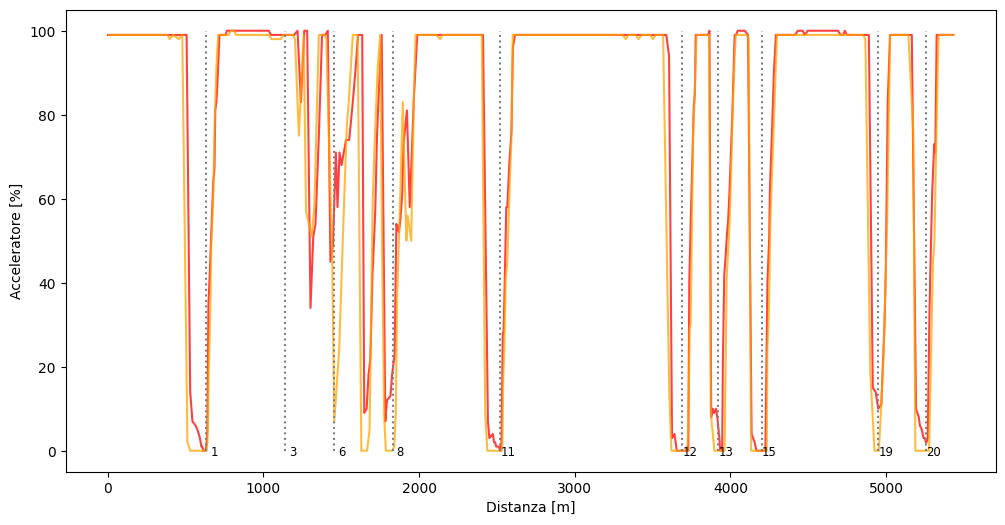

In [224]:

lec_pole_2023 = lec_pole_2023.get_car_data().add_distance()
nor_pole_2024 = nor_pole_2024.get_car_data().add_distance()

plt.figure(figsize=(12, 6))
plt.plot(lec_pole_2023['Distance'], lec_pole_2023['Throttle'], color = 'Red', label = 'LEC', alpha=.75)
plt.plot(nor_pole_2024['Distance'], nor_pole_2024['Throttle'], color = 'Orange', label = 'NOR', alpha=.75)

# Corners
for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        plt.text(corner['Distance']+50, 0, txt,
                va='center_baseline', ha='center', size='small')
 
plt.ylabel('Acceleratore [%]')
plt.vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=0, ymax=100,linestyles='dotted', colors='grey')
plt.xlabel('Distanza [m]')
plt.show()

Grafico velocità delle due pole

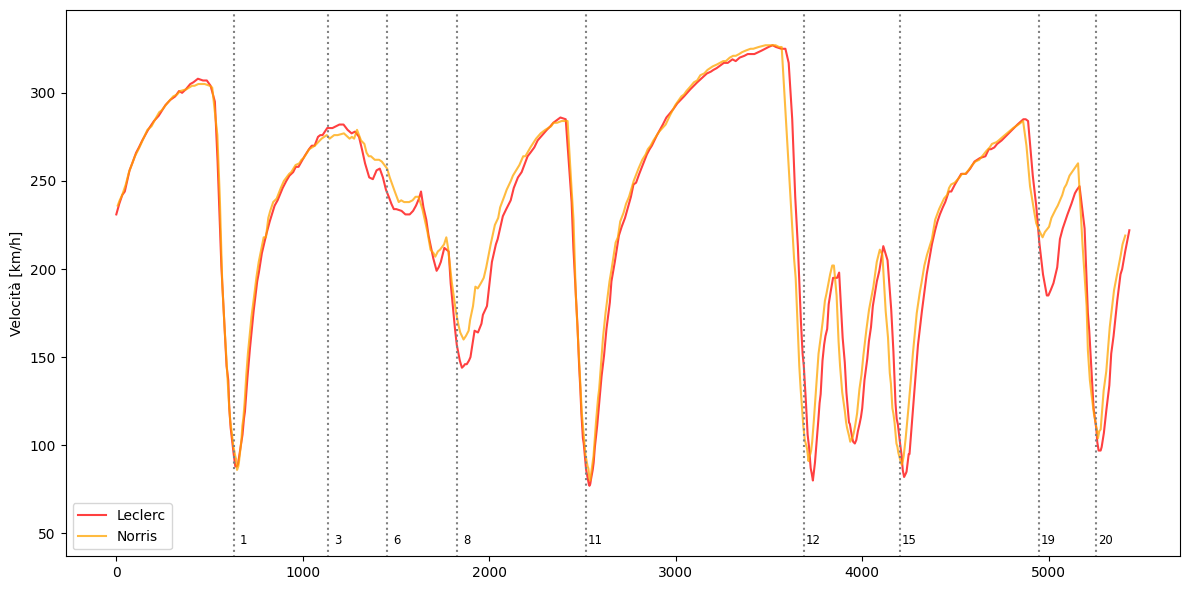

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(lec_pole_2023['Distance'], lec_pole_2023['Speed'], color = 'red', label = 'Leclerc', alpha=.75)
plt.plot(nor_pole_2024['Distance'], nor_pole_2024['Speed'], color = 'orange', label = 'Norris', alpha=.75)
 
plt.ylabel('Velocità [km/h]')

plt.legend(loc='lower left')

selected_corners = [i-1 for i in (1,3,6,8,11,12,15,19,20)]
v_min = lec_pole_2023['Speed'].min()
v_max = nor_pole_2024['Speed'].max()

plt.vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=v_min-50, ymax=v_max+20,
             linestyles='dotted', colors='grey')

# Corners
for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        plt.text(corner['Distance']+50, v_min-30, txt,
                va='center_baseline', ha='center', size='small')

plt.ylim([v_min - 40, v_max + 20])
plt.tight_layout()
plt.show()